In [1]:
from pycaret.nlp import *
import pyLDAvis
import pyLDAvis.gensim_models

#import pandas if we're gonna use a dataframe
import pandas as pd

# load the data into a dataframe
df = pd.read_csv('../data/in/trump_20200530_clean.csv')

In [2]:
# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# sampling the data to select only 1000 tweets
df = df.sample(1000, random_state=493).reset_index(drop=True)

In [4]:
df.shape
df.head()

(1000, 4)

,tweet,retweets,favorites,datetime
0,RT @realDonaldTrump: https://t.co/9GEW2VZu5h,12230,0,2020-02-08 12:13:16
1,RT @mitchellvii: General Flynn Posts Triumphant Tweet Following Release of Handwritten FBI Notes Revealing He Was Framed https://t.co/JWVLF…,4910,0,2020-04-30 12:04:54
2,In 1960 there were approximately 20000 pages in the Code of Federal Regulations. Today there are over 185000 pages as seen in the Roosevelt Room.Today we CUT THE RED TAPE! It is time to SET FREE OUR DREAMS and MAKE AMERICA GREAT AGAIN! https://t.co/teAVNzjvcx,26104,88904,2017-12-14 20:35:13
3,RT @Mike_Pence: President @realDonaldTrump &amp; the entire Admin are pleased at the passage of the Paycheck Protection Program in the House. I…,5698,0,2020-04-24 04:18:10
4,RT @GOPChairwoman: Across the country the #PaycheckProtectionProgram that @realDonaldTrump signed is helping Americans. And in Wisconsin…,4797,0,2020-05-05 12:22:50


In [5]:
# initialize the setup
nlp = setup(data = df, target = 'tweet', session_id = 493, custom_stopwords = [ 'rt', 'https', 'http', 'co', 'amp'])

Description,Value
session_id,493
Documents,1000
Vocab Size,2928
Custom Stopwords,True


In [6]:
# create the model
lda = create_model('lda', num_topics = 6, multi_core = True)

In [7]:
# label the data using trained model
df_lda = assign_model(lda)

In [8]:
df_lda.head()

,tweet,retweets,favorites,datetime,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,realdonaldtrump,12230,0,2020-02-08 12:13:16,0.083467,0.083629,0.582612,0.083382,0.083479,0.083431,Topic 2,0.58
1,post triumphant tweet follow note reveal framed jwvlf,4910,0,2020-04-30 12:04:54,0.018528,0.018853,0.018606,0.906888,0.018561,0.018563,Topic 3,0.91
2,approximately page code federal regulation today page see roosevelt room today cut red tape time set free dream make great teavnzjvcx,26104,88904,2017-12-14 20:35:13,0.007609,0.007650,0.961856,0.007648,0.007599,0.007638,Topic 2,0.96
3,president realdonaldtrump entire admin pleased passage house,5698,0,2020-04-24 04:18:10,0.894570,0.021182,0.021323,0.020860,0.021027,0.021039,Topic 0,0.89
4,gopchairwoman country realdonaldtrump sign help wisconsin,4797,0,2020-05-05 12:22:50,0.288722,0.023950,0.441110,0.023913,0.024010,0.198295,Topic 2,0.44


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.015208  0.151385       1        1  26.016205
2     -0.052349 -0.168531       2        1  16.339547
3     -0.159563  0.044019       3        1  16.006570
0      0.114108  0.084280       4        1  14.762484
5      0.150167 -0.069255       5        1  14.253551
4     -0.037155 -0.041897       6        1  12.621643, topic_info=                    Term        Freq       Total Category  logprob  loglift
0        realdonaldtrump   59.000000   59.000000  Default  30.0000  30.0000
832           whitehouse   25.000000   25.000000  Default  29.0000  29.0000
166                 hard   23.000000   23.000000  Default  28.0000  28.0000
237                   go   65.000000   65.000000  Default  27.0000  27.0000
397                 work   39.000000   39.000000  Default  26.0000  26.0000
395                 take   32.000000   32.000000  Default  25.0000  25.0000
16                  make   57.000000   57.000000  Default  24.0000  24.0000
240                 read   15.000000   15.000000  Default  23.0000  23.0000
246                 want   44.000000   44.000000  Default  22.0000  22.0000
255                 many   40.000000   40.000000  Default  21.0000  21.0000
94                leader   11.000000   11.000000  Default  20.0000  20.0000
186                  get   75.000000   75.000000  Default  19.0000  19.0000
103                 good   47.000000   47.000000  Default  18.0000  18.0000
513               foxnew   16.000000   16.000000  Default  17.0000  17.0000
302                state   31.000000   31.000000  Default  16.0000  16.0000
522            collusion   18.000000   18.000000  Default  15.0000  15.0000
53                  know   26.000000   26.000000  Default  14.0000  14.0000
164                 show   18.000000   18.000000  Default  13.0000  13.0000
249                crime   30.000000   30.000000  Default  12.0000  12.0000
78                 thank   57.000000   57.000000  Default  11.0000  11.0000
410             american   25.000000   25.000000  Default  10.0000  10.0000
929                 real   10.000000   10.000000  Default   9.0000   9.0000
199                trump   54.000000   54.000000  Default   8.0000   8.0000
22                   see   30.000000   30.000000  Default   7.0000   7.0000
250                  job   49.000000   49.000000  Default   6.0000   6.0000
126                 keep   22.000000   22.000000  Default   5.0000   5.0000
15                 great  145.000000  145.000000  Default   4.0000   4.0000
601               debate    8.000000    8.000000  Default   3.0000   3.0000
37                  sign   14.000000   14.000000  Default   2.0000   2.0000
394                story   17.000000   17.000000  Default   1.0000   1.0000
1606              rating    9.085218    9.878463   Topic1  -5.7002   1.2627
838              testing    6.139523    6.779301   Topic1  -6.0921   1.2473
114         stock_market    6.099454    6.736642   Topic1  -6.0987   1.2471
2558             climate    5.216659    5.847867   Topic1  -6.2550   1.2322
903               prayer    4.949845    5.581069   Topic1  -6.3075   1.2264
615                 fund    4.859450    5.492549   Topic1  -6.3259   1.2240
164                 show   16.311234   18.476328   Topic1  -5.1150   1.2218
167           healthcare    4.470727    5.116588   Topic1  -6.4093   1.2115
1570            negative    4.306310    4.939697   Topic1  -6.4468   1.2092
1235                doom    4.303732    4.941329   Topic1  -6.4474   1.2083
1237              credit    4.139798    4.771786   Topic1  -6.4862   1.2044
2079             mueller    3.869954    4.514443   Topic1  -6.5536   1.1924
2471              wisdom    3.758152    4.391530   Topic1  -6.5829   1.1907
785                  yet    3.674367    4.309033   Topic1  -6.6055   1.1871
2804             portion    3.627801    4.260140   Topic1  -6.6182   1.1858
2872                hire    3

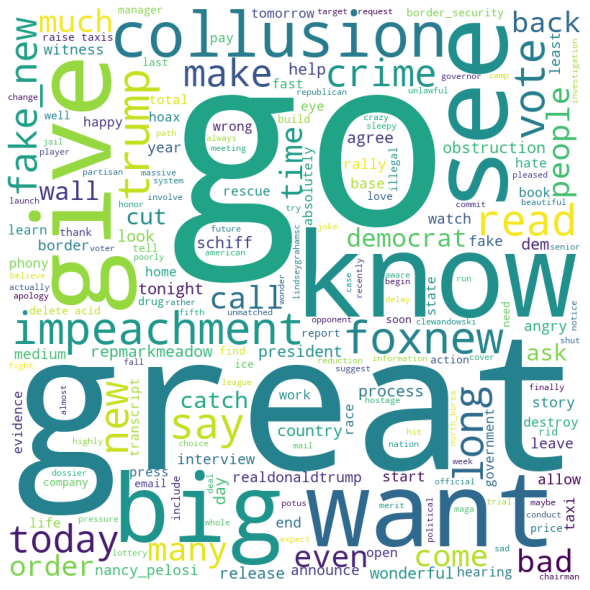

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
plot_model(lda, plot='topic_distribution')
plot_model(lda, plot='topic_model')
plot_model(lda, plot='wordcloud', topic_num = 'Topic 5')
plot_model(lda, plot='frequency', topic_num = 'Topic 5')
plot_model(lda, plot='bigram', topic_num = 'Topic 5')
plot_model(lda, plot='trigram', topic_num = 'Topic 5')
plot_model(lda, plot='distribution', topic_num = 'Topic 5')
plot_model(lda, plot='sentiment', topic_num = 'Topic 5')
plot_model(lda, plot='tsne')